In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import model_selection, svm
import pickle

In [3]:
# read data from folder
train_data = pd.read_csv('../data/train/data_removedStopWord.csv')

In [4]:
# rename column
train_data.rename( columns={'Unnamed: 0':'id'}, inplace=True )
print(train_data.head(5))

   id                                            content    label
0   0  hành_trình tour du_lịch mỹ bờ đông_du lữ_hành ...  Du_lich
1   1  phòng quanh khu_vực hồ_tùng_mậu phòng khép_kín...  Nha_dat
2   2  thuê nhà_riêng dt m sàn phòng ngủ p thoáng mát...  Nha_dat
3   3  thuê tầng khép_kín nguyễn_khoái bếp đầy_đủ tủ_...  Nha_dat
4   4  crumpler jackpack full photo giá vnđ vnđ đựng ...  Mua_sam


Text(0, 0.5, 'contents')

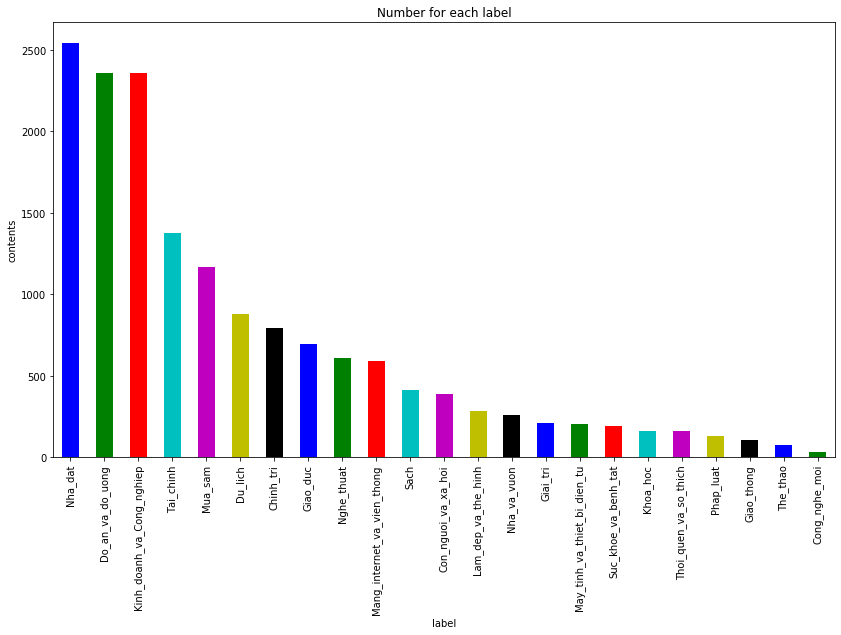

In [5]:
#visualize number for each label
ax = train_data['label'].value_counts().plot(kind='bar', 
                                             color=tuple(['b', 'g', 'r', 'c', 'm', 'y', 'k']),
                                             figsize=(14,8),
                                             title="Number for each label")
ax.set_xlabel("label")
ax.set_ylabel("contents")

In [6]:
#STEP : Prepare Train and Test Data sets
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(train_data['content'],train_data['label'],test_size=0.2)

In [7]:
print(Test_Y)

15658                   Nghe_thuat
14874             Do_an_va_do_uong
4239     Kinh_doanh_va_Cong_nghiep
7664                       Du_lich
11651             Do_an_va_do_uong
                   ...            
530            Lam_dep_va_the_hinh
2031                       Mua_sam
3132              Do_an_va_do_uong
13194             Do_an_va_do_uong
5124                      Giao_duc
Name: label, Length: 3200, dtype: object


In [8]:
#STEP : Encoding 
# conver label to number
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [9]:
pkl = "../model/labelEncoder.pkl"
with open(pkl, 'wb') as file:
    pickle.dump(Encoder, file)

In [10]:
print(Train_Y)

[14 15 15 ... 13  9 11]


In [11]:
#STEP : Word Vectorization
Tfidf_vect = TfidfVectorizer(max_features=10000)
Tfidf_vect.fit(train_data['content'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)# match word of Train_X with 10000 features
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [23]:
pkls = "../model/tfidf_vect.pkl"
with open(pkls, 'wb') as file:
    pickle.dump(Tfidf_vect, file)

In [14]:
print(Tfidf_vect.vocabulary_)

{'hành_trình': 2978, 'tour': 7696, 'du_lịch': 1957, 'mỹ': 4808, 'bờ': 771, 'lữ_hành': 4326, 'saigontourist': 6449, 'new': 4854, 'york': 9245, 'giấc': 2473, 'mơ': 4648, 'gọi': 2626, 'hàng': 2951, 'triệu': 7788, 'chinh_phục': 931, 'du_khách': 1955, 'tượng_đài': 8348, 'tự_do': 8531, 'duyên_dáng': 1986, 'vịnh': 8940, 'trung_tâm': 7821, 'manhattan': 4364, 'trụ_sở': 8023, 'tài_chính': 8120, 'thế_giới': 7413, 'phố': 5974, 'wall': 8978, 'khu': 3459, 'thủ_đô': 7496, 'washington': 8980, 'dạo': 2070, 'mall': 4357, 'choáng_ngợp': 974, 'công_trình': 1541, 'kỳ_vĩ': 3806, 'điện': 9440, 'đài': 9479, 'tưởng_niệm': 8344, 'nhà_trắng': 5248, 'kiến_trúc': 3660, 'hài_hoà': 2944, 'dc': 1851, 'ghi_nhận': 2317, 'thành_phố': 7189, 'đẹp': 9738, 'hợp': 3239, 'quốc': 6232, 'hoa_kỳ': 2769, 'đi': 9404, 'trải_nghiệm': 7958, 'mua_sắm': 4511, 'bất_tận': 626, 'http': 2887, 'www': 9025, 'dulichtet': 1967, 'com': 1332, 'nuoc': 5453, 'ngoai': 4926, 'phòng': 5888, 'quanh': 6108, 'khu_vực': 3462, 'hồ_tùng_mậu': 3198, 'khép_k

In [15]:
print(Train_X_Tfidf)

  (0, 9959)	0.08600316360216206
  (0, 9765)	0.11203621412552982
  (0, 9751)	0.13609630082718135
  (0, 9677)	0.07432560967822081
  (0, 9064)	0.1050309162611156
  (0, 8946)	0.06992907546281515
  (0, 8403)	0.08771722857899525
  (0, 8361)	0.10864055765314848
  (0, 8258)	0.12552597549630315
  (0, 8093)	0.06456489006510019
  (0, 7958)	0.07416717971097879
  (0, 7950)	0.26743267380998387
  (0, 7945)	0.1729376387278167
  (0, 7862)	0.07855651747871854
  (0, 7707)	0.1002408443515976
  (0, 7612)	0.11623476803856173
  (0, 7563)	0.08139388730413281
  (0, 7382)	0.09684055485242682
  (0, 6862)	0.06549364054694329
  (0, 6729)	0.07934726401651224
  (0, 6606)	0.1566453139914931
  (0, 6416)	0.06734818242770868
  (0, 5855)	0.0623738193230643
  (0, 5652)	0.10444649492168466
  (0, 5336)	0.09770546462615064
  :	:
  (12799, 6944)	0.300803067770267
  (12799, 6621)	0.10864742515144198
  (12799, 6525)	0.09244859920237536
  (12799, 5297)	0.08100978588574981
  (12799, 5279)	0.13375813405376777
  (12799, 4798)	0.131

In [16]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)

In [18]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)


SVM Accuracy Score ->  86.1875


In [19]:
#convert label to text
label_predict = Encoder.inverse_transform(predictions_SVM)
label_Y = Encoder.inverse_transform(Test_Y)

In [20]:
#visualize result of Test_Y
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization


(None,)

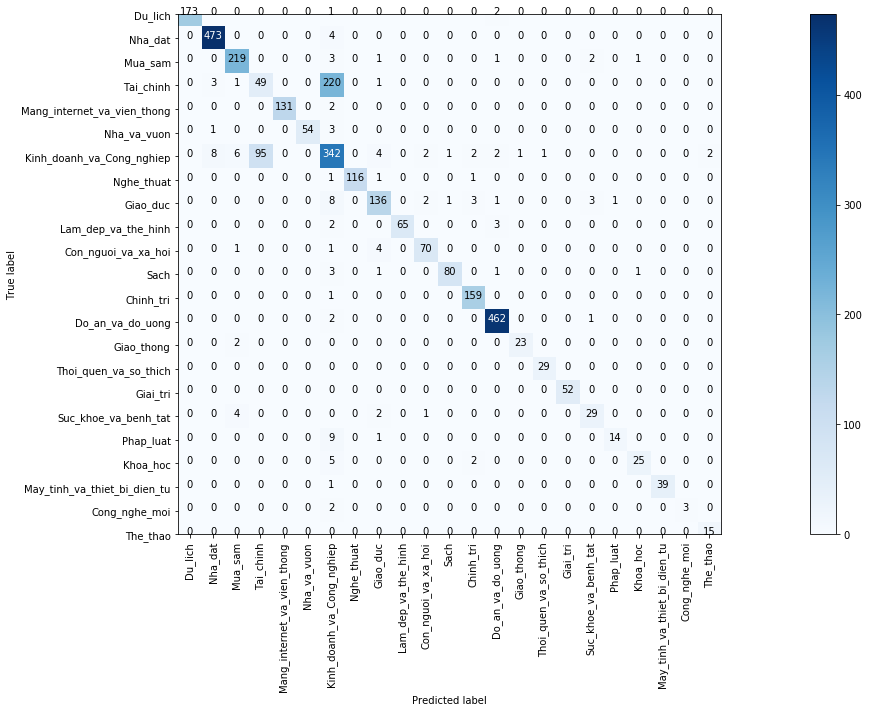

In [21]:
classes = train_data['label'].unique()
cnf_matrix = confusion_matrix(label_Y, label_predict,labels=classes)

# Plot non-normalized confusion matrix
plt.figure(figsize=(25,10))
plot_confusion_matrix(cnf_matrix, classes=classes),

In [24]:
#save model trained 
pkl_filename = "../model/pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(SVM, file)

In [26]:
# Load model from file
with open(pkl_filename, 'rb') as file:
    model = pickle.load(file)

In [27]:
# predict the labels on validation dataset
predictions_SVM = model.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)


SVM Accuracy Score ->  86.1875


In [ ]:
#c = 1.0 kernel = poly degree = 3 gamma = 'auto' accuracy = 16, 58333
#c = 1.0 kernel = linear degree = 3 gamma = 'auto' accuracy = 86, 58333
#c = 5.0 kernel = linear degree = 3 gamma = 'auto' accuracy = 84. 8541666
#c = 0.1 kernel = linear degree = 3 gamma = 'auto' accuracy =  83.77083333333334